dans ce fichier nous allons mettre les requêtes de filtres et nettoyage des données

Import pandas

In [35]:
import pandas as pd

Import des données : tables entières

In [36]:
tmdb = pd.read_csv("./donnees/TMDB/tmdb_full.csv", low_memory=False)

In [37]:
title_akas = pd.read_csv("./donnees/IMDb/title.akas.tsv/title.akas.tsv", sep="\t", low_memory=False)

In [38]:
title_basics = pd.read_csv("./donnees/IMDb/title.basics.tsv/title.basics.tsv", sep="\t", low_memory=False)
# title_basics.head()

In [39]:
title_crew = pd.read_csv("./donnees/IMDb/title.crew.tsv/title.crew.tsv", sep="\t", low_memory=False)

In [40]:
title_episode = pd.read_csv("./donnees/IMDb/title.episode.tsv/title.episode.tsv", sep="\t", low_memory=False)

In [41]:
title_principals = pd.read_csv("./donnees/IMDb/title.principals.tsv/title.principals.tsv", sep="\t", low_memory=False)

In [42]:
title_ratings = pd.read_csv("./donnees/IMDb/title.ratings.tsv/title.ratings.tsv", sep="\t", low_memory=False)

In [43]:
name_basics = pd.read_csv("./donnees/IMDb/name.basics.tsv/name.basics.tsv", sep="\t", low_memory=False)

Filtre par genre = Action et production countries = FR

In [44]:
tmdb_filtre = tmdb[(tmdb['genres'].str.contains('Action'))|(tmdb['production_countries'].str.contains('FR'))]

In [45]:
tmdb_filtre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45441 entries, 2 to 309568
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adult                         45441 non-null  bool   
 1   backdrop_path                 28949 non-null  object 
 2   budget                        45441 non-null  int64  
 3   genres                        45441 non-null  object 
 4   homepage                      5801 non-null   object 
 5   id                            45441 non-null  int64  
 6   imdb_id                       45441 non-null  object 
 7   original_language             45441 non-null  object 
 8   original_title                45441 non-null  object 
 9   overview                      42712 non-null  object 
 10  popularity                    45441 non-null  float64
 11  poster_path                   42182 non-null  object 
 12  production_countries          45441 non-null  object 
 13  relea

Liaisons à faire :
TMDB - Title_crew - title_principals - name_basics


In [46]:
table_films_select = pd.merge(tmdb_filtre, 
                              title_crew,
                              how="inner", 
                              left_on = "imdb_id",
                              right_on = "tconst"
                              )

In [47]:
table_films_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45272 entries, 0 to 45271
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adult                         45272 non-null  bool   
 1   backdrop_path                 28891 non-null  object 
 2   budget                        45272 non-null  int64  
 3   genres                        45272 non-null  object 
 4   homepage                      5773 non-null   object 
 5   id                            45272 non-null  int64  
 6   imdb_id                       45272 non-null  object 
 7   original_language             45272 non-null  object 
 8   original_title                45272 non-null  object 
 9   overview                      42562 non-null  object 
 10  popularity                    45272 non-null  float64
 11  poster_path                   42070 non-null  object 
 12  production_countries          45272 non-null  object 
 13  r

In [48]:
table_films_select = table_films_select.drop(['backdrop_path','homepage','video','production_companies_name','production_companies_country'],axis=1)

In [49]:
table_films_select = pd.merge(table_films_select, 
                              title_principals,
                              how="left", 
                              left_on = "tconst",
                              right_on = "tconst"
                              )

In [50]:
table_films_select.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,vote_average,vote_count,tconst,directors,writers,ordering,nconst,category,job,characters
0,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,6.7,41,tt0055747,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",1.0,nm0529543,actor,\N,"[""Antoine Doinel (segment \""Antoine et Colette..."
1,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,6.7,41,tt0055747,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",2.0,nm0685494,actress,\N,"[""Colette (segment \""Antoine et Colette\"")""]"
2,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,6.7,41,tt0055747,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",3.0,nm0041756,actor,\N,"[""René (segment \""Antoine et Colette\"")""]"
3,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,6.7,41,tt0055747,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",4.0,nm0890248,actress,\N,"[""La mère de Colette (segment \""Antoine et Col..."
4,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,6.7,41,tt0055747,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",5.0,nm0200950,actor,\N,"[""Le beau-père de Colette (segment \""Antoine e..."


In [51]:
table_films_select = table_films_select.drop(['ordering','job'],axis=1)

In [52]:
table_films_select = pd.merge(table_films_select, 
                              name_basics,
                              how="left", 
                              left_on = "nconst",
                              right_on = "nconst"
                              )

In [53]:
table_films_select.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,directors,writers,nconst,category,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",nm0529543,actor,"[""Antoine Doinel (segment \""Antoine et Colette...",Jean-Pierre Léaud,1944,\N,"actor,assistant_director,director","tt0053198,tt0099818,tt0060675,tt0065651"
1,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",nm0685494,actress,"[""Colette (segment \""Antoine et Colette\"")""]",Marie-France Pisier,1944,2011,"actress,writer,director","tt0072826,tt0078771,tt0082156,tt0074184"
2,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",nm0041756,actor,"[""René (segment \""Antoine et Colette\"")""]",Patrick Auffay,\N,\N,actor,"tt0053198,tt1180329,tt0055747,tt7371654"
3,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",nm0890248,actress,"[""La mère de Colette (segment \""Antoine et Col...",Rosy Varte,1923,2012,"actress,miscellaneous,archive_footage","tt0167643,tt1180329,tt0055747,tt0122617"
4,False,0,"['Drama', 'Romance']",8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,3.77,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,...,"nm0410982,nm0649096,nm0744022,nm0000076,nm0906667","nm0410982,nm0649096,nm0744022,nm0760434,nm0824...",nm0200950,actor,"[""Le beau-père de Colette (segment \""Antoine e...",François Darbon,1915,1998,"actor,miscellaneous,archive_footage","tt1369743,tt0275822,tt0268795,tt1063369"


In [54]:
table_films_select = table_films_select.drop(['birthYear','deathYear','primaryProfession'],axis=1)

In [55]:
table_films_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770236 entries, 0 to 770235
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 770236 non-null  bool   
 1   budget                770236 non-null  int64  
 2   genres                770236 non-null  object 
 3   id                    770236 non-null  int64  
 4   imdb_id               770236 non-null  object 
 5   original_language     770236 non-null  object 
 6   original_title        770236 non-null  object 
 7   overview              732422 non-null  object 
 8   popularity            770236 non-null  float64
 9   poster_path           729654 non-null  object 
 10  production_countries  770236 non-null  object 
 11  release_date          762336 non-null  object 
 12  revenue               770236 non-null  int64  
 13  runtime               770236 non-null  int64  
 14  spoken_languages      770236 non-null  object 
 15  

In [56]:
table_films_select.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tconst', 'directors', 'writers', 'nconst', 'category',
       'characters', 'primaryName', 'knownForTitles'],
      dtype='object')

In [57]:
table_films_select.to_csv('./donnees/table_films_select.csv', sep="\t")

In [58]:
table_films_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770236 entries, 0 to 770235
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 770236 non-null  bool   
 1   budget                770236 non-null  int64  
 2   genres                770236 non-null  object 
 3   id                    770236 non-null  int64  
 4   imdb_id               770236 non-null  object 
 5   original_language     770236 non-null  object 
 6   original_title        770236 non-null  object 
 7   overview              732422 non-null  object 
 8   popularity            770236 non-null  float64
 9   poster_path           729654 non-null  object 
 10  production_countries  770236 non-null  object 
 11  release_date          762336 non-null  object 
 12  revenue               770236 non-null  int64  
 13  runtime               770236 non-null  int64  
 14  spoken_languages      770236 non-null  object 
 15  

On part du csv créer table_films_select.csv

In [59]:
films_tmdb_imdb = pd.read_csv("./donnees/table_films_select.csv", sep="\t", low_memory=False)

In [60]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770236 entries, 0 to 770235
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            770236 non-null  int64  
 1   adult                 770236 non-null  bool   
 2   budget                770236 non-null  int64  
 3   genres                770236 non-null  object 
 4   id                    770236 non-null  int64  
 5   imdb_id               770236 non-null  object 
 6   original_language     770236 non-null  object 
 7   original_title        770236 non-null  object 
 8   overview              732422 non-null  object 
 9   popularity            770236 non-null  float64
 10  poster_path           729654 non-null  object 
 11  production_countries  770236 non-null  object 
 12  release_date          762336 non-null  object 
 13  revenue               770236 non-null  int64  
 14  runtime               770236 non-null  int64  
 15  

In [61]:
films_tmdb_imdb = films_tmdb_imdb.drop('Unnamed: 0',axis=1)

In [62]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770236 entries, 0 to 770235
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 770236 non-null  bool   
 1   budget                770236 non-null  int64  
 2   genres                770236 non-null  object 
 3   id                    770236 non-null  int64  
 4   imdb_id               770236 non-null  object 
 5   original_language     770236 non-null  object 
 6   original_title        770236 non-null  object 
 7   overview              732422 non-null  object 
 8   popularity            770236 non-null  float64
 9   poster_path           729654 non-null  object 
 10  production_countries  770236 non-null  object 
 11  release_date          762336 non-null  object 
 12  revenue               770236 non-null  int64  
 13  runtime               770236 non-null  int64  
 14  spoken_languages      770236 non-null  object 
 15  

In [63]:
films_tmdb_imdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,7.702360e+05,7.702360e+05,770236.000000,7.702360e+05,770236.000000,770236.000000,770236.000000
mean,3.774859e+06,3.010780e+05,6.191450,9.421314e+06,90.381723,4.998949,223.894323
std,1.986768e+07,2.875090e+05,47.845206,7.210167e+07,63.002854,2.423442,1243.803580
min,0.000000e+00,6.000000e+00,0.600000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,6.454300e+04,0.960000,0.000000e+00,83.000000,4.280000,2.000000
50%,0.000000e+00,2.071270e+05,1.833000,0.000000e+00,93.000000,5.700000,8.000000
75%,0.000000e+00,4.654060e+05,4.810000,0.000000e+00,106.000000,6.574000,38.000000
max,5.793304e+08,1.122427e+06,4665.438000,2.923706e+09,12480.000000,10.000000,33630.000000


In [64]:
films_tmdb_imdb['release_date']=pd.to_datetime(films_tmdb_imdb['release_date'])

In [65]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770236 entries, 0 to 770235
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 770236 non-null  bool          
 1   budget                770236 non-null  int64         
 2   genres                770236 non-null  object        
 3   id                    770236 non-null  int64         
 4   imdb_id               770236 non-null  object        
 5   original_language     770236 non-null  object        
 6   original_title        770236 non-null  object        
 7   overview              732422 non-null  object        
 8   popularity            770236 non-null  float64       
 9   poster_path           729654 non-null  object        
 10  production_countries  770236 non-null  object        
 11  release_date          762336 non-null  datetime64[ns]
 12  revenue               770236 non-null  int64         
 13 

On drop tagline car rarement l'info

In [66]:
films_tmdb_imdb = films_tmdb_imdb.drop('tagline', axis=1)

On ne garde que ce qui ont un résumé

In [67]:
films_tmdb_imdb.dropna(subset = ['overview'], inplace=True)

In [68]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732422 entries, 0 to 770235
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 732422 non-null  bool          
 1   budget                732422 non-null  int64         
 2   genres                732422 non-null  object        
 3   id                    732422 non-null  int64         
 4   imdb_id               732422 non-null  object        
 5   original_language     732422 non-null  object        
 6   original_title        732422 non-null  object        
 7   overview              732422 non-null  object        
 8   popularity            732422 non-null  float64       
 9   poster_path           697788 non-null  object        
 10  production_countries  732422 non-null  object        
 11  release_date          725935 non-null  datetime64[ns]
 12  revenue               732422 non-null  int64         
 13  runt

On ne garde que ce qui a un poster

In [69]:
films_tmdb_imdb.dropna(subset = ['poster_path'], inplace=True)

In [70]:
films_tmdb_imdb.isna().sum()

adult                      0
budget                     0
genres                     0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_countries       0
release_date            3016
revenue                    0
runtime                    0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
tconst                     0
directors                  0
writers                    0
nconst                    75
category                  75
characters                75
primaryName               75
knownForTitles            75
dtype: int64

In [71]:
films_tmdb_imdb.dropna(subset = ['release_date'], inplace=True)

In [72]:
films_tmdb_imdb.isna().sum()

adult                    0
budget                   0
genres                   0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
title                    0
vote_average             0
vote_count               0
tconst                   0
directors                0
writers                  0
nconst                  73
category                73
characters              73
primaryName             73
knownForTitles          73
dtype: int64

On garde que si info sur personne = nconst, category, ...

In [73]:
films_tmdb_imdb.dropna(subset = ['nconst','category','characters','primaryName','knownForTitles'], inplace=True)

In [74]:
films_tmdb_imdb.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
tconst                  0
directors               0
writers                 0
nconst                  0
category                0
characters              0
primaryName             0
knownForTitles          0
dtype: int64

In [75]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694699 entries, 0 to 770235
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 694699 non-null  bool          
 1   budget                694699 non-null  int64         
 2   genres                694699 non-null  object        
 3   id                    694699 non-null  int64         
 4   imdb_id               694699 non-null  object        
 5   original_language     694699 non-null  object        
 6   original_title        694699 non-null  object        
 7   overview              694699 non-null  object        
 8   popularity            694699 non-null  float64       
 9   poster_path           694699 non-null  object        
 10  production_countries  694699 non-null  object        
 11  release_date          694699 non-null  datetime64[ns]
 12  revenue               694699 non-null  int64         
 13  runt

On drop tconst car fait doublon avec imdb_id

In [76]:
films_tmdb_imdb[['tconst','imdb_id']]

,tconst,imdb_id
0,tt0055747,tt0055747
1,tt0055747,tt0055747
2,tt0055747,tt0055747
3,tt0055747,tt0055747
4,tt0055747,tt0055747
...,...,...
770231,tt17352384,tt17352384
770232,tt17352384,tt17352384
770233,tt17352384,tt17352384
770234,tt17352384,tt17352384


In [77]:
films_tmdb_imdb = films_tmdb_imdb.drop('tconst', axis=1)

In [78]:
films_tmdb_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694699 entries, 0 to 770235
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 694699 non-null  bool          
 1   budget                694699 non-null  int64         
 2   genres                694699 non-null  object        
 3   id                    694699 non-null  int64         
 4   imdb_id               694699 non-null  object        
 5   original_language     694699 non-null  object        
 6   original_title        694699 non-null  object        
 7   overview              694699 non-null  object        
 8   popularity            694699 non-null  float64       
 9   poster_path           694699 non-null  object        
 10  production_countries  694699 non-null  object        
 11  release_date          694699 non-null  datetime64[ns]
 12  revenue               694699 non-null  int64         
 13  runt

On renomme id  en id_tmdb pour clarifier

In [79]:
films_tmdb_imdb = films_tmdb_imdb.rename(columns={'id':'id_tmdb'})

on va filtrer selon le vote average basé sur un nombre de vote plutôt  que popularity on ne sait pas trop comment c'est calculé et ce n'est pas cohérent avec vote_average

In [80]:
films_tmdb_imdb[['vote_average','popularity']].value_counts(sort=True)


vote_average  popularity
0.000         0.600         25684
              1.400          3689
5.000         0.600          3440
0.000         0.840          3334
6.000         0.600          3332
                            ...  
6.800         1.294             1
4.100         1.031             1
6.672         3.988             1
4.900         0.854             1
5.900         1.820             1
Name: count, Length: 29444, dtype: int64

Max de vote_average= 10 = les films sont notés sur 10

In [81]:
films_tmdb_imdb['vote_average'].max()

10.0

on prend les films avec votete_average supérieur à 5

In [82]:
films_tmdb_imdb_sup5 = films_tmdb_imdb[films_tmdb_imdb['vote_average']>5]

In [83]:
films_tmdb_imdb_sup5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462885 entries, 0 to 770134
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 462885 non-null  bool          
 1   budget                462885 non-null  int64         
 2   genres                462885 non-null  object        
 3   id_tmdb               462885 non-null  int64         
 4   imdb_id               462885 non-null  object        
 5   original_language     462885 non-null  object        
 6   original_title        462885 non-null  object        
 7   overview              462885 non-null  object        
 8   popularity            462885 non-null  float64       
 9   poster_path           462885 non-null  object        
 10  production_countries  462885 non-null  object        
 11  release_date          462885 non-null  datetime64[ns]
 12  revenue               462885 non-null  int64         
 13  runt

filtre selon date de sortie

In [84]:
from datetime import datetime

on ajoute une colonne année

In [85]:
films_tmdb_imdb_sup5['year'] = films_tmdb_imdb_sup5['release_date'].dt.year

C:\Users\LOTUS\AppData\Local\Temp\ipykernel_16056\2621779178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_tmdb_imdb_sup5['year'] = films_tmdb_imdb_sup5['release_date'].dt.year


In [86]:
films_tmdb_imdb_sup5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462885 entries, 0 to 770134
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 462885 non-null  bool          
 1   budget                462885 non-null  int64         
 2   genres                462885 non-null  object        
 3   id_tmdb               462885 non-null  int64         
 4   imdb_id               462885 non-null  object        
 5   original_language     462885 non-null  object        
 6   original_title        462885 non-null  object        
 7   overview              462885 non-null  object        
 8   popularity            462885 non-null  float64       
 9   poster_path           462885 non-null  object        
 10  production_countries  462885 non-null  object        
 11  release_date          462885 non-null  datetime64[ns]
 12  revenue               462885 non-null  int64         
 13  runt

In [87]:
films_tmdb_imdb_sup5['year'].value_counts(sort=True)

year
2019    17487
2017    17399
2022    16683
2018    16511
2016    15588
        ...  
1898       20
1894        8
1892        7
1874        4
1878        1
Name: count, Length: 133, dtype: int64

On va garder les années après 2000 inclus

In [88]:
films_tmdb_imdb_sup5_2000 = films_tmdb_imdb_sup5[films_tmdb_imdb_sup5['year']> 1999]

In [89]:
films_tmdb_imdb_sup5_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272237 entries, 70 to 770046
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 272237 non-null  bool          
 1   budget                272237 non-null  int64         
 2   genres                272237 non-null  object        
 3   id_tmdb               272237 non-null  int64         
 4   imdb_id               272237 non-null  object        
 5   original_language     272237 non-null  object        
 6   original_title        272237 non-null  object        
 7   overview              272237 non-null  object        
 8   popularity            272237 non-null  float64       
 9   poster_path           272237 non-null  object        
 10  production_countries  272237 non-null  object        
 11  release_date          272237 non-null  datetime64[ns]
 12  revenue               272237 non-null  int64         
 13  run

Nombre de films sélectionnés : 

In [90]:
len(films_tmdb_imdb_sup5_2000['id_tmdb'].unique())

14672

durée des films 

In [91]:
liste = list(films_tmdb_imdb_sup5_2000['runtime'].unique())
liste.sort()
liste

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


on prend les films plus longs que 60 minutes

In [92]:
films_tmdb_imdb_sup5_2000_60 = films_tmdb_imdb_sup5_2000[films_tmdb_imdb_sup5_2000['runtime']>=60]

In [93]:
films_tmdb_imdb_sup5_2000_60.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246079 entries, 70 to 769918
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 246079 non-null  bool          
 1   budget                246079 non-null  int64         
 2   genres                246079 non-null  object        
 3   id_tmdb               246079 non-null  int64         
 4   imdb_id               246079 non-null  object        
 5   original_language     246079 non-null  object        
 6   original_title        246079 non-null  object        
 7   overview              246079 non-null  object        
 8   popularity            246079 non-null  float64       
 9   poster_path           246079 non-null  object        
 10  production_countries  246079 non-null  object        
 11  release_date          246079 non-null  datetime64[ns]
 12  revenue               246079 non-null  int64         
 13  run

Nombre de films qui durent plus de 60 minutes inclues sortis à partir de 2000 et qui ont une note supérieure à 5.

In [94]:
len(films_tmdb_imdb_sup5_2000_60['id_tmdb'].unique())

12771

On prend les films qui sont sortis (Released) et on enlève les films In Production => en fait il n'y a pas de films en production

In [95]:
films_tmdb_imdb_sup5_2000_60[films_tmdb_imdb_sup5_2000_60['status'] == 'In Production']

,adult,budget,genres,id_tmdb,imdb_id,original_language,original_title,overview,popularity,poster_path,...,vote_average,vote_count,directors,writers,nconst,category,characters,primaryName,knownForTitles,year


In [96]:
films_tmdb_imdb_sup5_2000_60_released = films_tmdb_imdb_sup5_2000_60[films_tmdb_imdb_sup5_2000_60['status'] == 'Released']

In [103]:
films_tmdb_imdb_sup5_2000_60_released.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246079 entries, 70 to 769918
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   adult                 246079 non-null  bool          
 1   budget                246079 non-null  int64         
 2   genres                246079 non-null  object        
 3   id_tmdb               246079 non-null  int64         
 4   imdb_id               246079 non-null  object        
 5   original_language     246079 non-null  object        
 6   original_title        246079 non-null  object        
 7   overview              246079 non-null  object        
 8   popularity            246079 non-null  float64       
 9   poster_path           246079 non-null  object        
 10  production_countries  246079 non-null  object        
 11  release_date          246079 non-null  datetime64[ns]
 12  revenue               246079 non-null  int64         
 13  run

In [104]:
len(films_tmdb_imdb_sup5_2000_60_released['original_title'].unique())


12644

In [106]:
len(films_tmdb_imdb_sup5_2000_60_released['imdb_id'].unique())

12771

Je regarde si les original_title apparaissent plusieurs fois = OUI => mais c'est normal soit plusieurs films avec même titre soit plusieurs acteurs...

In [107]:
films_tmdb_imdb_sup5_2000_60_released['original_title'].value_counts()

original_title
Home                                             61
Deux                                             61
Vendetta                                         59
Anna                                             56
Charlie's Angels                                 53
                                                 ..
Antifa: Chasseurs de skins                        1
La Vallée close                                   1
Musk vs Bezos, la nouvelle guerre des étoiles     1
Des traîtres dans la Résistance                   1
Ta'ang                                            1
Name: count, Length: 12644, dtype: int64

On regarde dans title_akas la région de la version du titre et on prend quand France   
On met na=False pour ignorer les valeurs NaN sinon on a une erreur

In [ ]:
# title_akas_FR = title_akas[title_akas['region'].str.contains('FR', na=False)]

In [ ]:
# title_akas_FR.info()

In [ ]:
# title_akas_FR_reduit = title_akas_FR[['titleId','title','region','language']]
# title_akas_FR_reduit.info()

In [ ]:
# films_tmdb_imdb_sup5_2000_60_released_regFR = pd.merge(films_tmdb_imdb_sup5_2000_60_released,
#                                                        title_akas_FR_reduit,
#                                                        how='inner',
#                                                        left_on='imdb_id',
#                                                        right_on='titleId')

In [108]:
films_select = films_tmdb_imdb_sup5_2000_60_released[['adult','budget','genres','id_tmdb','imdb_id','original_language','original_title','original_title','overview','popularity','poster_path','production_countries','release_date' ,'revenue','runtime','spoken_languages','status','title' ,'vote_average','vote_count','directors','writers','year'                        
                        
                        ]]


In [109]:
films_select.duplicated().sum()

233308

In [110]:
films_select = films_select.drop_duplicates()

In [111]:
films_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12771 entries, 70 to 769907
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 12771 non-null  bool          
 1   budget                12771 non-null  int64         
 2   genres                12771 non-null  object        
 3   id_tmdb               12771 non-null  int64         
 4   imdb_id               12771 non-null  object        
 5   original_language     12771 non-null  object        
 6   original_title        12771 non-null  object        
 7   original_title        12771 non-null  object        
 8   overview              12771 non-null  object        
 9   popularity            12771 non-null  float64       
 10  poster_path           12771 non-null  object        
 11  production_countries  12771 non-null  object        
 12  release_date          12771 non-null  datetime64[ns]
 13  revenue            

In [112]:
films_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12771 entries, 70 to 769907
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 12771 non-null  bool          
 1   budget                12771 non-null  int64         
 2   genres                12771 non-null  object        
 3   id_tmdb               12771 non-null  int64         
 4   imdb_id               12771 non-null  object        
 5   original_language     12771 non-null  object        
 6   original_title        12771 non-null  object        
 7   original_title        12771 non-null  object        
 8   overview              12771 non-null  object        
 9   popularity            12771 non-null  float64       
 10  poster_path           12771 non-null  object        
 11  production_countries  12771 non-null  object        
 12  release_date          12771 non-null  datetime64[ns]
 13  revenue            

In [113]:
films_select.to_csv('./donnees/films_selectionnes.csv', sep="\t")

In [114]:
films_tmdb_imdb_sup5_2000_60_released.to_csv('./donnees/films_tmdb_imdb_sup5_2000_60_released.csv', sep="\t")

Vérif qu'il n'y a que des films dans la liste pas de court métrage... avec table titre.basic

J'importe le csv des films que nous avons exportés = films_selectionnes

In [115]:
films = pd.read_csv("./donnees/films_selectionnes.csv", sep="\t", low_memory=False)

In [116]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [117]:
title_basics.duplicated().sum()

0

In [118]:
title_basics['tconst'].value_counts()

tconst
tt0000001     1
tt31216525    1
tt31216514    1
tt31216515    1
tt31216516    1
             ..
tt15097232    1
tt15097234    1
tt15097236    1
tt15097238    1
tt9916880     1
Name: count, Length: 11230548, dtype: int64

In [119]:
title_basics['tconst'].duplicated().sum()

0

In [120]:
films.duplicated().sum()

0

In [121]:
films['imdb_id'].duplicated().sum()

0

In [122]:
films.head()

,Unnamed: 0,adult,budget,genres,id_tmdb,imdb_id,original_language,original_title,original_title.1,overview,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,directors,writers,year
0,70,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",...,40031879,141,['en'],Released,Dancer in the Dark,7.881,1555,nm0001885,"nm0001885,nm0797604",2000
1,109,False,140000000,"['Adventure', 'Fantasy', 'Action']",22,tt0325980,en,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 18th-century pira...",...,655011224,143,['en'],Released,Pirates of the Caribbean: The Curse of the Bla...,7.800,18710,nm0893659,"nm0254645,nm0744429,nm0064181,nm0938684",2003
2,133,False,30000000,"['Action', 'Crime']",24,tt0266697,en,Kill Bill: Vol. 1,Kill Bill: Vol. 1,"An assassin is shot by her ruthless employer, ...",...,180906076,111,"['en', 'ja', 'fr']",Released,Kill Bill: Vol. 1,7.970,15748,nm0000233,"nm0000233,nm0000235",2003
3,154,False,200000000,"['Adventure', 'Fantasy', 'Action']",58,tt0383574,en,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,...,1065659812,151,"['en', 'tr', 'el', 'zh']",Released,Pirates of the Caribbean: Dead Man's Chest,7.340,14465,nm0893659,"nm0254645,nm0744429,nm0064181,nm0938684",2006
4,196,False,2000000,"['Thriller', 'Crime', 'Drama']",67,tt0445620,en,Paradise Now,Paradise Now,Two childhood friends are recruited for a suic...,...,3395627,90,"['ar', 'en']",Released,Paradise Now,6.941,219,nm0009463,"nm0009463,nm1178208,nm0388293",2005


In [123]:
verif_que_films = pd.merge(films,
                           title_basics,
                           how='left',
                           left_on='imdb_id',
                           right_on = 'tconst')

verif_que_films

,Unnamed: 0,adult,budget,genres_x,id_tmdb,imdb_id,original_language,original_title,original_title.1,overview,...,year,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y
0,70,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",...,2000,tt0168629,movie,Dancer in the Dark,Dancer in the Dark,0,2000,\N,140,"Crime,Drama,Musical"
1,109,False,140000000,"['Adventure', 'Fantasy', 'Action']",22,tt0325980,en,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 18th-century pira...",...,2003,tt0325980,movie,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,0,2003,\N,143,"Action,Adventure,Fantasy"
2,133,False,30000000,"['Action', 'Crime']",24,tt0266697,en,Kill Bill: Vol. 1,Kill Bill: Vol. 1,"An assassin is shot by her ruthless employer, ...",...,2003,tt0266697,movie,Kill Bill: Vol. 1,Kill Bill: Vol. 1,0,2003,\N,111,"Action,Crime,Thriller"
3,154,False,200000000,"['Adventure', 'Fantasy', 'Action']",58,tt0383574,en,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,...,2006,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy"
4,196,False,2000000,"['Thriller', 'Crime', 'Drama']",67,tt0445620,en,Paradise Now,Paradise Now,Two childhood friends are recruited for a suic...,...,2005,tt0445620,movie,Paradise Now,Paradise Now,0,2005,\N,91,"Crime,Drama,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12766,768003,False,0,['Crime'],218455,tt0398990,fr,Les eaux troubles,Les eaux troubles,Clara takes her daughter and her friends to a ...,...,2004,tt0398990,tvMovie,Troubled Waters,Les eaux troubles,0,2004,\N,190,Crime
12767,768121,False,0,['Drama'],219173,tt1576452,es,Por tu culpa,Por tu culpa,"Are we what others see, or are we what we allo...",...,2010,tt1576452,movie,It's Your Fault,Por tu culpa,0,2010,\N,87,Drama
12768,768702,False,0,['Action'],222409,tt1512732,en,Braille,Braille,Nick's blindness is symbolic to his regret for...,...,2011,tt1512732,movie,Braille,Braille,0,2009,\N,90,Action
12769,769648,False,0,['Documentary'],228655,tt2007418,fr,Les trois disparitions de Soad Hosni,Les trois disparitions de Soad Hosni,This haunting and beautifully formed documenta...,...,2011,tt2007418,movie,Les trois disparitions de Soad Hosni,Les trois disparitions de Soad Hosni,0,2011,\N,70,Documentary


In [124]:
verif_que_films['titleType'].value_counts()

titleType
movie           11016
tvMovie           789
video             458
tvSpecial         359
tvEpisode          79
tvSeries           39
tvMiniSeries       25
videoGame           4
short               2
Name: count, dtype: int64

In [125]:
verif_que_films[['runtime','runtimeMinutes']]

,runtime,runtimeMinutes
0,141,140
1,143,143
2,111,111
3,151,151
4,90,91
...,...,...
12766,190,190
12767,87,87
12768,90,90
12769,70,70


In [126]:
verif_que_films.columns

Index(['Unnamed: 0', 'adult', 'budget', 'genres_x', 'id_tmdb', 'imdb_id',
       'original_language', 'original_title', 'original_title.1', 'overview',
       'popularity', 'poster_path', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'directors', 'writers', 'year', 'tconst',
       'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_y'],
      dtype='object')

il y a des séries ... dans notre liste de films donc je les supprime = je sélectionne que le titleType = movie

In [127]:
films_v2 = verif_que_films[verif_que_films['titleType'] == 'movie']
films_v2.head()

,Unnamed: 0,adult,budget,genres_x,id_tmdb,imdb_id,original_language,original_title,original_title.1,overview,...,year,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres_y
0,70,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",...,2000,tt0168629,movie,Dancer in the Dark,Dancer in the Dark,0,2000,\N,140,"Crime,Drama,Musical"
1,109,False,140000000,"['Adventure', 'Fantasy', 'Action']",22,tt0325980,en,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 18th-century pira...",...,2003,tt0325980,movie,Pirates of the Caribbean: The Curse of the Bla...,Pirates of the Caribbean: The Curse of the Bla...,0,2003,\N,143,"Action,Adventure,Fantasy"
2,133,False,30000000,"['Action', 'Crime']",24,tt0266697,en,Kill Bill: Vol. 1,Kill Bill: Vol. 1,"An assassin is shot by her ruthless employer, ...",...,2003,tt0266697,movie,Kill Bill: Vol. 1,Kill Bill: Vol. 1,0,2003,\N,111,"Action,Crime,Thriller"
3,154,False,200000000,"['Adventure', 'Fantasy', 'Action']",58,tt0383574,en,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,...,2006,tt0383574,movie,Pirates of the Caribbean: Dead Man's Chest,Pirates of the Caribbean: Dead Man's Chest,0,2006,\N,151,"Action,Adventure,Fantasy"
4,196,False,2000000,"['Thriller', 'Crime', 'Drama']",67,tt0445620,en,Paradise Now,Paradise Now,Two childhood friends are recruited for a suic...,...,2005,tt0445620,movie,Paradise Now,Paradise Now,0,2005,\N,91,"Crime,Drama,Thriller"


In [128]:
films_v2 = films_v2.drop(['tconst','titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_y','original_title.1'], axis=1)

J'importe le fichier contenant les films et les personnes

In [129]:
films_personnes_import = pd.read_csv('./donnees/films_tmdb_imdb_sup5_2000_60_released.csv', sep="\t")

Je filtre ce fichier pour enlever les series...

on liste les id_tmdb de films_v2

In [130]:
liste_code_tmdb = list(films_v2['id_tmdb'])
liste_code_tmdb

[16,
 22,
 24,
 58,
 67,
 71,
 79,
 82,
 98,
 116,
 120,
 121,
 122,
 134,
 146,
 155,
 156,
 179,
 180,
 187,
 189,
 194,
 201,
 206,
 217,
 237,
 245,
 246,
 254,
 257,
 272,
 277,
 285,
 291,
 296,
 300,
 302,
 308,
 326,
 331,
 337,
 341,
 349,
 350,
 393,
 395,
 423,
 435,
 440,
 445,
 479,
 480,
 503,
 508,
 534,
 537,
 540,
 553,
 557,
 558,
 559,
 561,
 570,
 582,
 584,
 588,
 598,
 604,
 605,
 608,
 612,
 616,
 647,
 652,
 670,
 676,
 747,
 752,
 787,
 834,
 843,
 844,
 853,
 855,
 869,
 924,
 955,
 956,
 979,
 1018,
 1115,
 1116,
 1123,
 1164,
 1165,
 1247,
 1248,
 1250,
 1251,
 1254,
 1266,
 1268,
 1271,
 1278,
 1364,
 1372,
 1379,
 1407,
 1427,
 1428,
 1436,
 1441,
 1450,
 1452,
 1487,
 1493,
 1494,
 1495,
 1534,
 1535,
 1540,
 1549,
 1553,
 1555,
 1571,
 1576,
 1577,
 1579,
 1593,
 1609,
 1613,
 1619,
 1620,
 1622,
 1635,
 1647,
 1653,
 1656,
 1667,
 1722,
 1724,
 1726,
 1729,
 1730,
 1734,
 1735,
 1738,
 1771,
 1782,
 1783,
 1791,
 1826,
 1830,
 1836,
 1837,
 1845,
 1858,

On vérifie que les idètmsd de notre import soit dans la liste des id_tmdb des films sélectionnés après tous nos filtres (films_v2)

In [131]:
films_personnes = films_personnes_import [films_personnes_import['id_tmdb'].isin(liste_code_tmdb)]
films_personnes.head()

,Unnamed: 0,adult,budget,genres,id_tmdb,imdb_id,original_language,original_title,overview,popularity,...,vote_average,vote_count,directors,writers,nconst,category,characters,primaryName,knownForTitles,year
0,70,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001951,actress,"[""Selma Jezkova""]",Björk,"tt0168629,tt11138512,tt0138545,tt0110413",2000
1,71,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0000366,actress,"[""Kathy""]",Catherine Deneuve,"tt0283832,tt0061395,tt0168629,tt0058450",2000
2,72,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001556,actor,"[""Bill Houston""]",David Morse,"tt0120689,tt0887912,tt0117500,tt0816711",2000
3,73,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001780,actor,"[""Jeff""]",Peter Stormare,"tt0116282,tt0168629,tt0355295,tt0360486",2000
4,74,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,...,7.881,1555,nm0001885,"nm0001885,nm0797604",nm0001297,actor,"[""Oldrich Novy""]",Joel Grey,"tt0068327,tt0089901,tt0168629,tt1024715",2000


In [132]:
films_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 12770
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11016 non-null  int64  
 1   adult                 11016 non-null  bool   
 2   budget                11016 non-null  int64  
 3   genres_x              11016 non-null  object 
 4   id_tmdb               11016 non-null  int64  
 5   imdb_id               11016 non-null  object 
 6   original_language     11016 non-null  object 
 7   original_title        11016 non-null  object 
 8   overview              11016 non-null  object 
 9   popularity            11016 non-null  float64
 10  poster_path           11016 non-null  object 
 11  production_countries  11016 non-null  object 
 12  release_date          11016 non-null  object 
 13  revenue               11016 non-null  int64  
 14  runtime               11016 non-null  int64  
 15  spoken_languages      11

In [133]:
films_personnes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217136 entries, 0 to 246078
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            217136 non-null  int64  
 1   adult                 217136 non-null  bool   
 2   budget                217136 non-null  int64  
 3   genres                217136 non-null  object 
 4   id_tmdb               217136 non-null  int64  
 5   imdb_id               217136 non-null  object 
 6   original_language     217136 non-null  object 
 7   original_title        217136 non-null  object 
 8   overview              217136 non-null  object 
 9   popularity            217136 non-null  float64
 10  poster_path           217136 non-null  object 
 11  production_countries  217136 non-null  object 
 12  release_date          217136 non-null  object 
 13  revenue               217136 non-null  int64  
 14  runtime               217136 non-null  int64  
 15  spoke

In [134]:
films.columns

Index(['Unnamed: 0', 'adult', 'budget', 'genres', 'id_tmdb', 'imdb_id',
       'original_language', 'original_title', 'original_title.1', 'overview',
       'popularity', 'poster_path', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'directors', 'writers', 'year'],
      dtype='object')

In [135]:
films_personnes.columns

Index(['Unnamed: 0', 'adult', 'budget', 'genres', 'id_tmdb', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_countries', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'status', 'title', 'vote_average',
       'vote_count', 'directors', 'writers', 'nconst', 'category',
       'characters', 'primaryName', 'knownForTitles', 'year'],
      dtype='object')

In [136]:
from datetime import datetime

In [137]:
films_v2['release_date'] = pd.to_datetime(films_v2['release_date'])

In [138]:
films_v2['year'] = films_v2['release_date'].dt.year
films_v2['year']

0        2000
1        2003
2        2003
3        2006
4        2005
         ... 
12765    2013
12767    2010
12768    2011
12769    2011
12770    2011
Name: year, Length: 11016, dtype: int32

In [139]:
films_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 12770
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            11016 non-null  int64         
 1   adult                 11016 non-null  bool          
 2   budget                11016 non-null  int64         
 3   genres_x              11016 non-null  object        
 4   id_tmdb               11016 non-null  int64         
 5   imdb_id               11016 non-null  object        
 6   original_language     11016 non-null  object        
 7   original_title        11016 non-null  object        
 8   overview              11016 non-null  object        
 9   popularity            11016 non-null  float64       
 10  poster_path           11016 non-null  object        
 11  production_countries  11016 non-null  object        
 12  release_date          11016 non-null  datetime64[ns]
 13  revenue              

>On vérifie l'année de sortie max pour être sur qu'il n'y a pas de valeurs aberrantes ex futur

In [140]:
max_year = films_v2['year'].max()
max_year

2023

In [141]:
import seaborn as sns

On vérifie les budgets : il y a beaucoup de valeurs à 0, on suppose que cela signifie que l'info n'est pas dispo. On les enlèvera pour les stat mais on garde dans la liste de films

<Axes: xlabel='budget'>

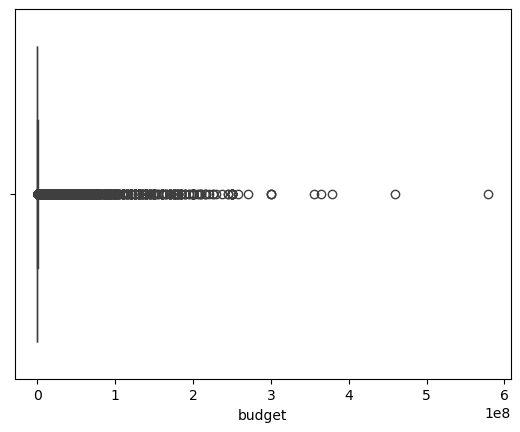

In [142]:
sns.boxplot(films_v2, x='budget')

On regarde le revenue il y a également bcp de 0. On les enlèvera pour les stat mais on garde dans la liste de films

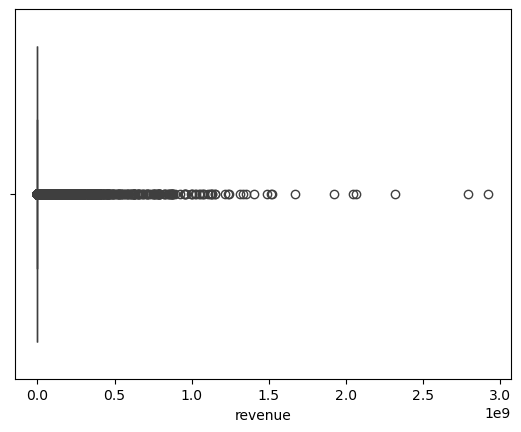

In [143]:
sns.boxplot(films_v2, x='revenue');

On verifie la durée des films : il y en a des longs mais c'est plausible : un très long documentaire

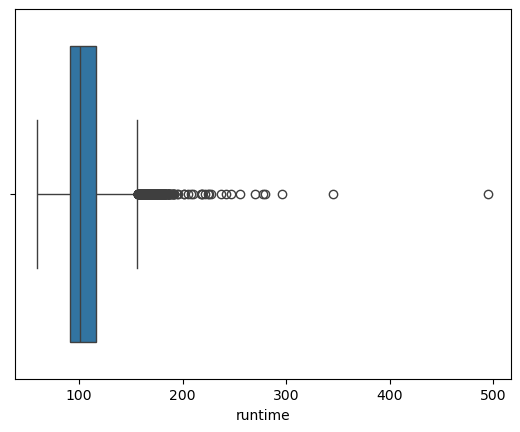

In [144]:
sns.boxplot(films_v2, x='runtime');

In [145]:
films_v2['runtime'].max()

495

In [146]:
films_v2[(films_v2['runtime'] > 240)]

,Unnamed: 0,adult,budget,genres_x,id_tmdb,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,directors,writers,year
2626,132216,False,70000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",791373,tt12361974,en,Zack Snyder's Justice League,Determined to ensure Superman's ultimate sacri...,118.937,...,0,242,['en'],Released,Zack Snyder's Justice League,8.200,8818,nm0811583,"nm0796950,nm0795975,nm0811583,nm0006516,nm3263...",2021
4747,227051,False,0,['Documentary'],517772,tt8296608,zh,死靈魂,"In Gansu Province, northwest China, lie the re...",1.400,...,0,495,['zh'],Released,Dead Souls,6.700,15,nm1504063,nm1504063,2018
6191,291642,False,55000000,"['Action', 'Crime', 'Thriller']",414419,tt6019206,en,Kill Bill: The Whole Bloody Affair,An assassin is shot and almost killed by her r...,15.364,...,0,247,"['en', 'cn', 'fr', 'es', 'ja']",Released,Kill Bill: The Whole Bloody Affair,8.000,875,nm0000233,"nm0000233,nm0000235",2011
7011,332585,False,0,['Documentary'],354895,tt2720844,fr,"Paris, la ville à remonter le temps","Paris, 5,000 years of History: an exclusive jo...",0.913,...,0,296,['cs'],Released,"Paris, the Great Saga",6.500,2,nm2219454,\N,2012
8868,460021,False,0,"['War', 'Drama', 'History']",63195,tt0257497,fr,"La Commune (Paris, 1871)",We are in the year 1871. A journalist for Vers...,4.304,...,0,345,['fr'],Released,"La Commune (Paris, 1871)",7.481,26,nm0914386,"nm1057964,nm0914386",2003
9192,488246,False,0,"['Action', 'War', 'History']",71920,tt0347416,hi,LOC: Kargil,This film dramatizes events that occurred as t...,4.726,...,0,255,['hi'],Released,LOC: Kargil,5.938,16,nm0244892,"nm0244892,nm0244898",2003
10506,592194,False,0,['Drama'],149429,tt1226247,en,Now Showing,Rita is named after a famous American movie st...,0.768,...,0,280,['tl'],Released,Now Showing,7.400,5,nm2016451,nm2016451,2008
12110,711606,False,0,['Documentary'],300210,tt0403462,en,Route 181: Fragments of a Journey in Palestine...,Route 181 is the epic record of a road trip un...,0.681,...,0,270,"['ar', 'he']",Released,Route 181: Fragments of a Journey in Palestine...,7.300,3,"nm0451674,nm0803346","nm0451674,nm0803346",2004
12705,755322,False,0,"['War', 'Romance', 'Drama', 'History']",125738,tt0406551,ar,باب الشمس‎‎,Yousry Nasrallah's powerful adaptation of Leba...,1.400,...,0,278,"['en', 'ar', 'fr']",Released,The Gate of the Sun,6.000,4,nm0621915,"nm0451898,nm0621915,nm1593811",2004


On regarde la moyenne des votes: il y a bien quelques films qui se démarquent mais ça reste < 10 donc c'est plausible

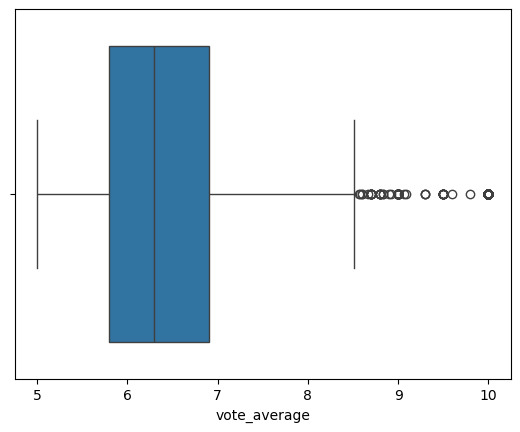

In [147]:
sns.boxplot(films_v2, x='vote_average');

on regarde le nombre de vote : pas interprétable

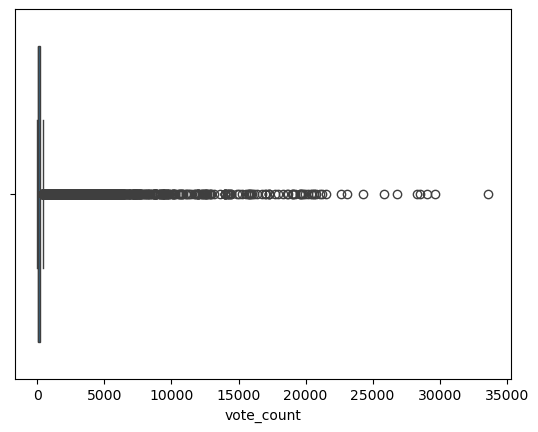

In [148]:
sns.boxplot(films_v2, x='vote_count');

In [149]:
films_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 12770
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            11016 non-null  int64         
 1   adult                 11016 non-null  bool          
 2   budget                11016 non-null  int64         
 3   genres_x              11016 non-null  object        
 4   id_tmdb               11016 non-null  int64         
 5   imdb_id               11016 non-null  object        
 6   original_language     11016 non-null  object        
 7   original_title        11016 non-null  object        
 8   overview              11016 non-null  object        
 9   popularity            11016 non-null  float64       
 10  poster_path           11016 non-null  object        
 11  production_countries  11016 non-null  object        
 12  release_date          11016 non-null  datetime64[ns]
 13  revenue              

In [150]:
films_v2 = films_v2[films_v2['genres_x'].str.contains('TV Movie')==False]
films_v2

,Unnamed: 0,adult,budget,genres_x,id_tmdb,imdb_id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,directors,writers,year
0,70,False,12800000,"['Drama', 'Crime']",16,tt0168629,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",13.781,...,40031879,141,['en'],Released,Dancer in the Dark,7.881,1555,nm0001885,"nm0001885,nm0797604",2000
1,109,False,140000000,"['Adventure', 'Fantasy', 'Action']",22,tt0325980,en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 18th-century pira...",88.516,...,655011224,143,['en'],Released,Pirates of the Caribbean: The Curse of the Bla...,7.800,18710,nm0893659,"nm0254645,nm0744429,nm0064181,nm0938684",2003
2,133,False,30000000,"['Action', 'Crime']",24,tt0266697,en,Kill Bill: Vol. 1,"An assassin is shot by her ruthless employer, ...",31.556,...,180906076,111,"['en', 'ja', 'fr']",Released,Kill Bill: Vol. 1,7.970,15748,nm0000233,"nm0000233,nm0000235",2003
3,154,False,200000000,"['Adventure', 'Fantasy', 'Action']",58,tt0383574,en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,71.717,...,1065659812,151,"['en', 'tr', 'el', 'zh']",Released,Pirates of the Caribbean: Dead Man's Chest,7.340,14465,nm0893659,"nm0254645,nm0744429,nm0064181,nm0938684",2006
4,196,False,2000000,"['Thriller', 'Crime', 'Drama']",67,tt0445620,en,Paradise Now,Two childhood friends are recruited for a suic...,7.400,...,3395627,90,"['ar', 'en']",Released,Paradise Now,6.941,219,nm0009463,"nm0009463,nm1178208,nm0388293",2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,767462,False,0,['Drama'],215034,tt3118628,en,Bastardo,Larger-than-life characters populate director ...,1.378,...,0,106,['ar'],Released,Bastard,7.000,1,nm0067946,"nm0067946,nm2144991",2013
12767,768121,False,0,['Drama'],219173,tt1576452,es,Por tu culpa,"Are we what others see, or are we what we allo...",0.743,...,0,87,['es'],Released,It's Your Fault,6.000,5,nm1318393,"nm1318393,nm1196938",2010
12768,768702,False,0,['Action'],222409,tt1512732,en,Braille,Nick's blindness is symbolic to his regret for...,0.824,...,0,90,[],Released,Braille,6.000,1,nm2065393,"nm2065393,nm1863128",2011
12769,769648,False,0,['Documentary'],228655,tt2007418,fr,Les trois disparitions de Soad Hosni,This haunting and beautifully formed documenta...,0.840,...,0,70,"['ar', 'en', 'fr']",Released,The Three Disappearances of Soad Hosni,6.000,1,nm1645751,nm1645751,2011


In [151]:
films_v2.to_csv('./donnees/export_films.csv', sep="\t")

In [152]:
films_personnes.to_csv('./donnees/export_films_personnes.csv', sep="\t")